In [1]:
### read the user timeline data ..
## check the decline or rise of juul data per month
## same for marijuana..

In [122]:
import pandas as pd
import numpy as np
import os
import git
import ast
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm_notebook as tqdm
import tweepy

In [3]:
def get_git_root(path):
    git_repo = git.Repo(path, search_parent_directories=True)
    git_root = git_repo.git.rev_parse("--show-toplevel")
    return git_root

In [4]:
Juul_list = set(['JUUL','juulvapor','juulnation','doit4juul'])

In [5]:
def literal_return(val):
    try:
        return ast.literal_eval(val)
    except ValueError:
        return (val)

In [6]:
def check_inlist(val):
    if (type(val) == str):
        val = ast.literal_eval(val)
        if (val != None):
            a, b =  map(set, [map(str.lower, val), map(str.lower, Juul_list)])
            if len(a & b) >= 1:
                return True
            else:
                return False

In [7]:
hexagon_path = os.path.join(get_git_root(os.getcwd()),"input","hexagonData.csv")

In [8]:
user_timeline = pd.read_csv(hexagon_path,lineterminator="\n")

In [ ]:
len(user_timeline)

In [109]:
# so everyone of the tweets extracted from hexagon api have juul in the tweets
len(user_timeline[user_timeline['hashtags'].apply(check_inlist) == True])

12443

In [114]:
# converting to datetime before grouping
user_timeline['tweetCreatedAt'] = pd.to_datetime(user_timeline['tweetCreatedAt'])

In [126]:
user_timeline.sort_values(by='tweetCreatedAt',inplace=True)

In [129]:
## group by tweetCreated at by month
user_timeline.set_index('tweetCreatedAt',inplace=True,drop=True)

In [250]:
len(user_timeline)

12516

In [170]:
# tweets = user_timeline.groupby(by=[user_timeline.index.year,user_timeline.index.month])['tweetId'].agg('count')
tweets = user_timeline.groupby(pd.Grouper(freq='M'))['tweetId'].agg('count')

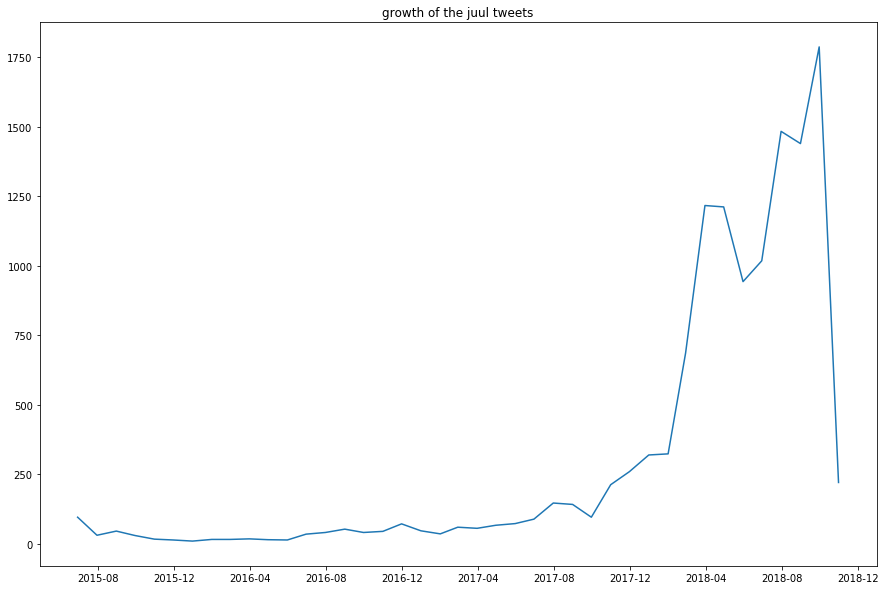

In [281]:
# plot the dataset
plt.figure(figsize=(15,10))
plt.plot(tweets.index,tweets.values)
plt.title("growth of the juul tweets")
plt.show()

In [184]:
## usign the same dataset to get the marijuana tweets
## read the weed words pattern
weed_df = pd.read_excel("/Users/akshayuppal/Desktop/thesis/backup_stuff/Weed_words.xlsx")

In [266]:
weed_words =  [str(" " + ele + " ") for ele in list(weed_df.weed)]
pattern_weed = "|".join(weed_words)

In [207]:
weed_tweets = user_timeline.loc[user_timeline['tweetText'].str.contains(pattern_weed) == True]

In [208]:
# tweets = user_timeline.groupby(by=[user_timeline.index.year,user_timeline.index.month])['tweetId'].agg('count')
weeds = weed_tweets.groupby(pd.Grouper(freq='M'))['tweetId'].agg('count')

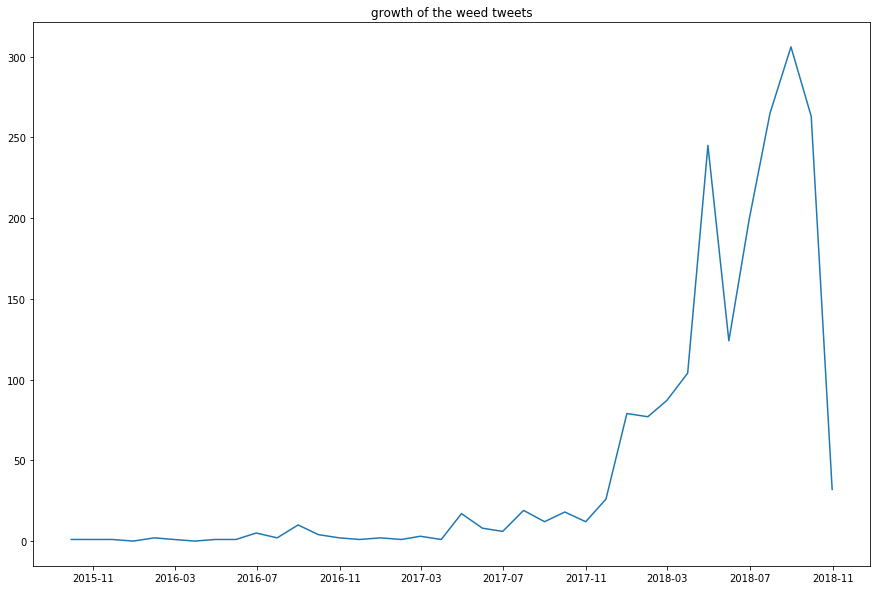

In [214]:
## rise of weed tweets over time
plt.figure(figsize=(15,10))
plt.plot(weeds.index,weeds.values)
plt.title("growth of the weed tweets")
plt.show()

In [252]:
# importing the user timeline with 200 tweets
timeline_user = pd.read_csv("/Users/akshayuppal/Desktop/thesis/twitter_juul/input/userTimelineData.csv",lineterminator="\n")


In [253]:
juul_tweet_pattern = "|".join(Juul_list)

In [254]:
## find all of the juul_tweets
juul_tweets = timeline_user.loc[timeline_user['tweetText'].str.contains(juul_tweet_pattern)]

In [256]:
## total of the juul tweets from the timelines
len(juul_tweets)

5173

In [257]:
# converting to datetime before grouping
juul_tweets['tweetCreatedAt'] = pd.to_datetime(juul_tweets['tweetCreatedAt'])
juul_tweets.sort_values(by='tweetCreatedAt',inplace=True)

/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [245]:
## group by tweetCreated at by month
juul_tweets.set_index('tweetCreatedAt',inplace=True,drop=True)
tweets_juul = juul_tweets.groupby(pd.Grouper(freq='M'))['tweetId'].agg('count')

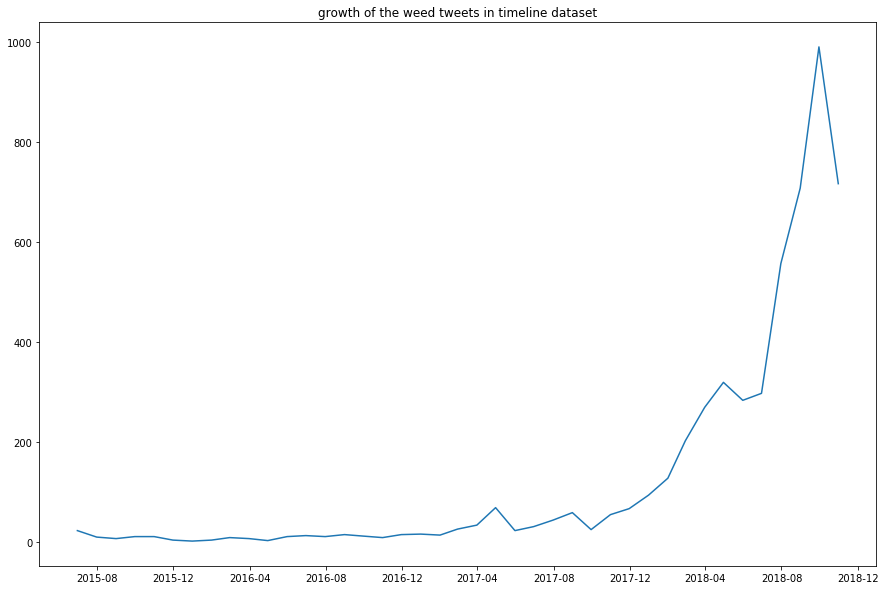

In [259]:
## rise of weed tweets over time ..cotains 200 tweets per user
plt.figure(figsize=(15,10))
plt.plot(tweets_juul.index,tweets_juul.values)
plt.title("growth of the juul tweets in timeline dataset")
plt.show()

In [275]:
# find all of the weed tweets
weed_tweets = timeline_user.loc[timeline_user['tweetText'].str.contains(pattern_weed)]

In [277]:
weed_tweets['tweetCreatedAt'] = pd.to_datetime(weed_tweets['tweetCreatedAt'])

/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [278]:
## group by tweetCreated at by month
weed_tweets.set_index('tweetCreatedAt',inplace=True,drop=True)
tweet_weeds = weed_tweets.groupby(pd.Grouper(freq='M'))['tweetId'].agg('count')

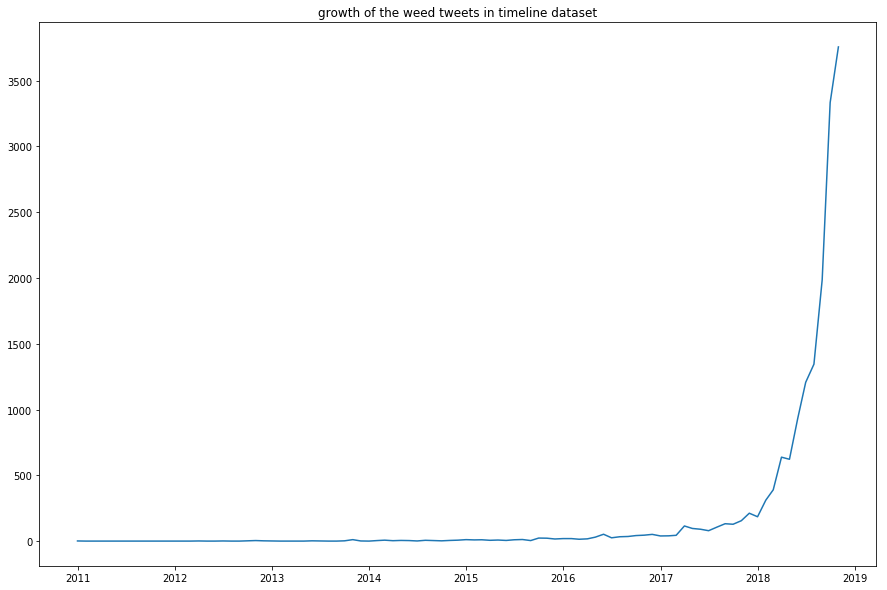

In [280]:
## rise of weed tweets over time ..cotains 200 tweets per user
plt.figure(figsize=(15,10))
plt.plot(tweet_weeds.index,tweet_weeds.values)
plt.title("growth of the weed tweets in timeline dataset")
plt.show()

In [9]:
## @TODO add it to python file
def create_retweet_edgelist(source_node,user_list,filename):
    with open(filename,"w+") as f: 
        for user in tqdm(user_list):
            apis.rotate(-1)
            api = apis[0]
            if (user != source_node):
                try:
                    relation_obj = api.show_friendship(source_id = int(source_node), target_id = (user))[0]
                    if (relation_obj.following == True):
                        f.write(str(source_node) + " " + str(user)+"\n")
                    if (relation_obj.followed_by == True):
                        f.write(str(user) + " " + str(source_node)+"\n")
                except tweepy.TweepError as e:
                    continue

In [10]:
## need to look at cascade the large cascade..
hexagon_data = pd.read_csv(hexagon_path,lineterminator="\n")

In [11]:
cascade1 = (hexagon_data.loc[hexagon_data['retweetCount'] ==781])

In [12]:
cascade1.sort_values(by='tweetCreatedAt',inplace=True)

/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
# getting the first node the sorted list
tattoo_node = cascade1.head(1)['userID'].values[0]

In [46]:
cascade1.head(1)['userID']

3853    1394686213
Name: userID, dtype: int64

In [47]:
tattoo_node

1394686213

In [14]:
user_tattoos = list(cascade1.userID)
user_tattoos.remove(tattoo_node)

In [20]:
create_retweet_edgelist(tattoo_node,user_tattoos,'tattoo.edgelist')


 52%|█████▏    | 309/597 [07:36<01:21,  3.55it/s]


100%|██████████| 597/597 [12:32<00:00,  3.53it/s]


In [114]:
# and the data has retweets of 598 / 781 
G_tattoo_1 = nx.read_adjlist('tattoo.edgelist',create_using=nx.DiGraph())

In [115]:
len(G_tattoo_1.edges())

365

In [116]:
# so 352/598 forms the 1st level connection
len(G_tattoo_1.nodes())

352

In [68]:
color_map = list()
for node in G_tattoo_1.nodes():
    if node != str(tattoo_node):
        color_map.append("red")
    else:
        color_map.append("yellow")

In [57]:
str(tattoo_node) in G_tattoo_1.nodes()

True

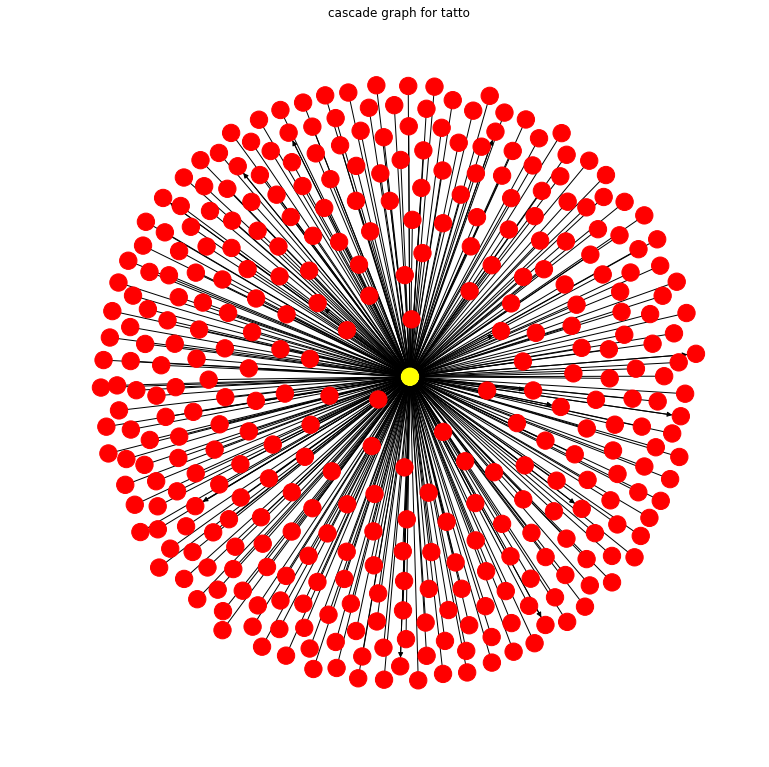

In [78]:
# cascade graph --dont rum
plt.figure(figsize=(10,10))
nx.draw_spring(G_tattoo_1,node_color=color_map,label=False)
plt.title("cascade graph for tatto")
plt.show()

In [85]:
# follower tatto node(in degree)
len(G_tattoo_1.in_edges(str(tattoo_node)))

351

In [84]:
# following tatto node(out degree)
len(G_tattoo_1.out_edges(str(tattoo_node)))

14

In [121]:
first_level_users = list(G_tattoo_1.nodes())
first_level_users.remove(str(tattoo_node))
first_level_users = [int(node) for node in first_level_nodes]

In [161]:
## getting to the second level of cascade
rem_users = list(set(user_tattoos) - set([int(node) for node in G_tattoo_1.nodes()]))
len(rem_users)
## 597 - 352

245

In [125]:
# the main follwoing graph 
G = nx.read_edgelist("/Users/akshayuppal/Desktop/thesis/twitter_juul/models/user-user_c.edgelist",
                     create_using=nx.DiGraph())


In [151]:
## # so the rem users dont have a direct conenction with the tattoo node so we will look at 
##the following graph(from main follwing garph of user)  of the first level node and also their follower network
blue_users = list()
with open("tattoo_1_lvl_following.edgelist","w+") as f:
    for node in tqdm(first_level_nodes):
        # get the following .. hence the outdegree of those nodes
        node = str(node)
        if (node) in G.nodes():
            following = [int(i[1]) for i in G.out_edges(node)]
            for user in rem_users:
                if (user) in following:
                    if user not in blue_users:
                        blue_users.append(user)
                    f.write(str(node) + ' ' + str(user) +'\n')

In [178]:
## getting the followers id for the list of rem users to check for 2nd level of users
df_tattoo_lvl_1 = pd.DataFrame()
df_tattoo_lvl_1['userID'] = first_level_users
df_tattoo_lvl_1.to_csv("/Users/akshayuppal/Desktop/thesis/twitter_juul/models/tattoo_users_lvl_1.csv")

In [165]:
# def following_network(users)
df = pd.DataFrame()
for user in tqdm(rem_users):
    try:
        apis.rotate(-1)
        api = apis[0]
        friendList = api.followers_ids(user)  # @API returns list of friends
        temp = pd.DataFrame(
            {'userID':user,
             'follower':[friendList]})
        df = df.append(temp)
    except:
        print("Some error in connection")
        continue

Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection


Rate limit reached. Sleeping for: 514


Some error in connection
Some error in connection
Some error in connection


Rate limit reached. Sleeping for: 88


Some error in connection
Some error in connection
Some error in connection


Rate limit reached. Sleeping for: 74


Some error in connection
Some error in connection


Rate limit reached. Sleeping for: 58


Some error in connection
Some error in connection


Rate limit reached. Sleeping for: 48


Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection


Rate limit reached. Sleeping for: 66


Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection


Rate limit reached. Sleeping for: 28


Some error in connection
Some error in connection


Rate limit reached. Sleeping for: 59


Some error in connection


Rate limit reached. Sleeping for: 59


Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection


Rate limit reached. Sleeping for: 24


Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection


Rate limit reached. Sleeping for: 45


Some error in connection


Rate limit reached. Sleeping for: 38


Some error in connection


Rate limit reached. Sleeping for: 32


Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection
Some error in connection


Rate limit reached. Sleeping for: 27


Some error in connection


In [171]:
## dumping the followers for tatto cascade level 1
df.to_csv("~/Desktop/thesis/twitter_juul/models/follower_tattoo_rem_users.csv")

In [167]:
followers_network = df

In [168]:
with open("tatto_1st_lvl_followers.edgelist","w+") as f:
    pink_users = list()
    for node in tqdm(first_level_users):
        for user in rem_users:
            followers = ast.literal_eval(followers_network.followers_list[followers_network.userID == node].values[0])[0]
            if user in set(followers):
                f.write(str(user) + " " + str(node) +"\n")
                pink_users.append(user)

AttributeError: 'DataFrame' object has no attribute 'followers_list'

### api

In [16]:
from authentication import Authenticate
from collections import deque

In [17]:
ob = Authenticate()
apis = deque(ob.api)